In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import numpy as np

> 데이터 불러오기

In [2]:
# 보스턴 데이터 세트 로드
boston_df= pd.read_csv("C:/apps/ml_7/datasets/Boston.csv", index_col=0)

# 데이터 전처리
y_target=boston_df['medv']
X_data= boston_df.drop('medv',axis=1)

# 알고리즘 선택, 평가
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 교차 검증의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(f'5 교차 검증의 평균 RMSE : {avg_rmse:.3f}')

5 교차 검증의 개별 Negative MSE scores :  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
5 교차 검증의 평균 RMSE : 4.423


> 3개 회귀 트리 모델로 회귀 수행

In [4]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg]

for model in models :
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 5.978 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 4.423 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 4.269 


GBRegressor의 RMSE 값이 가장 작게 나왔다

> 회귀 트리는 feature_importances_로 피처 중요도를 파악한다 (선형 회귀의 회귀 계수 역할)

<Axes: >

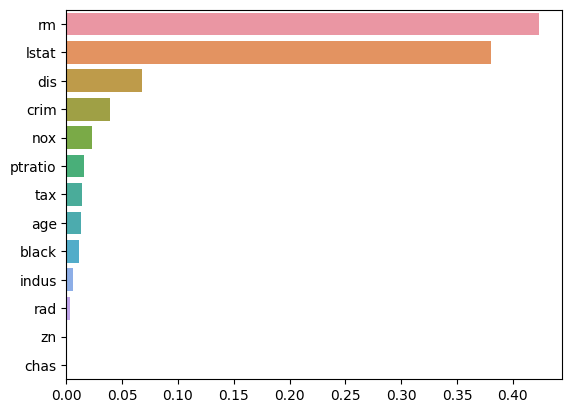

In [6]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

> 회기 트리의 오버 피팅 시각화

(100, 2)


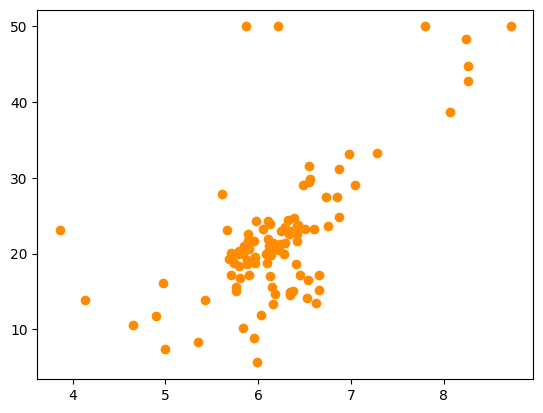

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

boston_df_sample = boston_df[['rm', 'medv']]
boston_df_sample = boston_df_sample.sample(n=100, random_state=0)
print(boston_df_sample.shape)

plt.figure()
plt.scatter(boston_df_sample.rm, boston_df_sample.medv, c='darkorange')

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성
# DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5, ~ 8.5 까지 100개 데이터 셋 생성
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 rm만, 그리고 결정 데이터인 medv 추출
X_feature = boston_df_sample['rm'].values.reshape(-1, 1)
y_target = boston_df_sample['medv'].values.reshape(-1, 1)

# 학습과 예측 수행
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

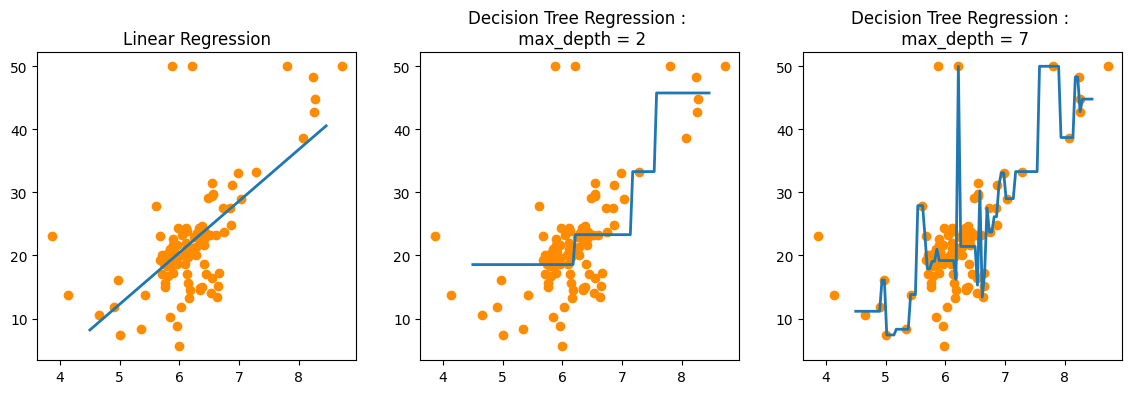

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (14, 4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(boston_df_sample.rm, boston_df_sample.medv, c='darkorange')
ax1.plot(X_test, pred_lr, label = 'linear', linewidth = 2)

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression : \n max_depth = 2')
ax2.scatter(boston_df_sample.rm, boston_df_sample.medv, c='darkorange')
ax2.plot(X_test, pred_rf2, label = 'max_depth:2', linewidth = 2)

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression : \n max_depth = 7')
ax3.scatter(boston_df_sample.rm, boston_df_sample.medv, c='darkorange')
ax3.plot(X_test, pred_rf7, label = 'max_depth:7', linewidth = 2)

선형 회귀는 직선으로 예측 회귀선을 표현

회귀 트리는 분할되는 데이터 지점에 따라 계단 형태로 회귀선 표현

DecisionTreeRegressor의 max_depth = 2인 경우 어느 정도 분류가 잘 됨

DecisionTreeRegressor의 max_depth = 7인 경우 학습데이터 세트의 이상치(outlier) 데이터도 학습하면서 복잡한 계단 형태의 회귀선을 만들어 과적합 모델을 만듦